# Содержание

- [Описание проекта](#step1)
- [Шаг 1. Загрузите данные](#step2)
- [Шаг 2. Проведите исследовательский анализ данных (EDA)](#step3)
- [Шаг 3. Постройте модель прогнозирования оттока клиентов](#step4)
- [Шаг 4. Сделайте кластеризацию клиентов](#step5)
- [Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами](#step6)

# Описание проекта <a id="step1"></a>

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.<br><br>
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.<br><br>
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.<br><br>
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.<br><br>
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.<br><br>
А именно:<br>
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    1. выделить целевые группы клиентов;
    2. предложить меры по снижению оттока;
    3. определить другие особенности взаимодействия с клиентами.<br><br>

# Шаг 1. Загрузите данные <a id="step2"></a>

In [1]:
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

#визуализация
import seaborn as sns; sns.set()


#ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьювера:</b> Рекомендую удалить лишние библиотеки из импорта, т.к. принято оставлять только те, которые будут использоваться в проекте =)
    
</div>

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')
data.head().T

,0,1,2,3,4
gender,1.000000,0.000000,0.000000,0.000000,1.000000
Near_Location,1.000000,1.000000,1.000000,1.000000,1.000000
Partner,1.000000,0.000000,1.000000,1.000000,1.000000
Promo_friends,1.000000,0.000000,0.000000,1.000000,1.000000
Phone,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,6.000000,12.000000,1.000000,12.000000,1.000000
Group_visits,1.000000,1.000000,0.000000,1.000000,0.000000
Age,29.000000,31.000000,28.000000,33.000000,26.000000
Avg_additional_charges_total,14.227470,113.202938,129.448479,62.669863,198.362265
Month_to_end_contract,5.000000,12.000000,1.000000,12.000000,1.000000


In [3]:
data.columns = data.columns.str.lower()
print('Дублей в строках: {}\n'.format(data.duplicated().sum()))
data.info()
data.head()

Дублей в строках: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Вывод: 
1. Дублей в данных нет
2. Пропусков в данных нет

# Шаг 2. Проведите исследовательский анализ данных (EDA) <a id="step3"></a>

#### Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Вывод:
- Распределение по возрасту почти равномерное
- Клиенты в большинстве случаев живут около клуба
- Чуть меньше половины клиентов являются партнерами фитнес-клуба
- 1/3 клиентов пришла по акции "Приведи друга"
- В базе есть номера 90% клиентов
- Средний период контракта 6.7 месяцев
- 41% клиентов посещают групповые занятия
- Средний возраст 29 лет
- Суммарная выручка от других услуг фитнес-центра: 146
- Контракты в среднем истекают через 4.3 месяца
- Средняя продолжительность посещения фитнес-клуба 3.7 месяцев
- Средняя частота посещений в неделю за все время с начала действия абонемента почти 1.9
- Средняя частота посещений в неделю за предыдущий месяц 1.8
- Отток клиентов равен 0.27

#### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [5]:
data.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Вывод:

- Распределение по полу различаются не существенно
- Те, кто живёт рядом меньше попадает в отток
- "Партнеры" меньше перестают посещать клуб
- "Приведи друга" меньше перестаюь посещать клуб также
- Отсутствие телефона не сказывается на оттоке
- Клиенты в оттоке уходят через месяц после первого посещения спортзала
- Пользователи в оттоке меньше посещают групповые занятия
- Пользователи в оттоке младше на 3 года
- Пользователи в оттоке меньше "дают" доп.денег
- У пользователей в оттоке меньше времени по контракту
- Средняя продолжительность посещения пользователей в оттоке меньше почти в 5 раз
- За всё время пользователи в оттоке меньше посещают зал в среднем за неделю
- За месяц (в среднем за неделю) пользователи в оттоке посещают зал в два раза меньше

#### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

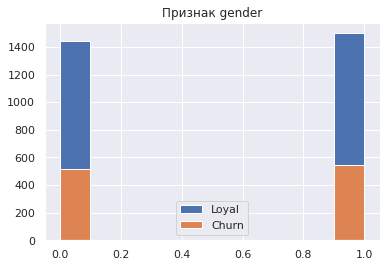

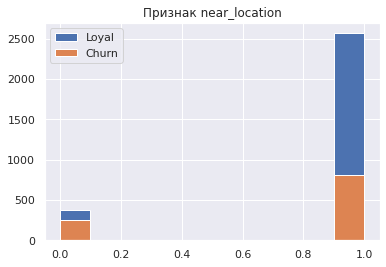

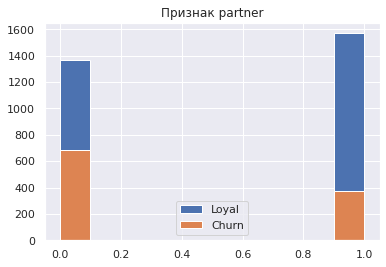

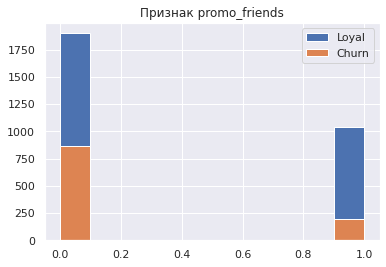

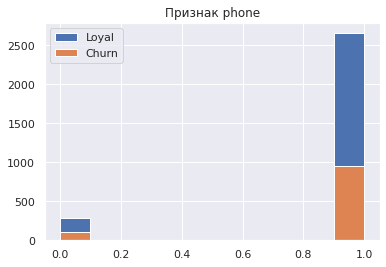

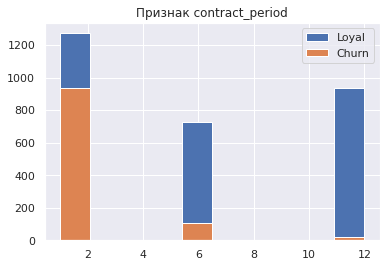

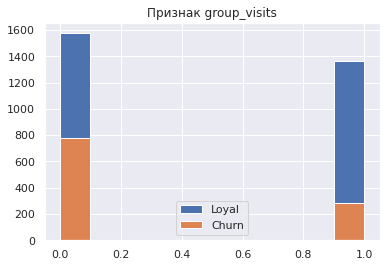

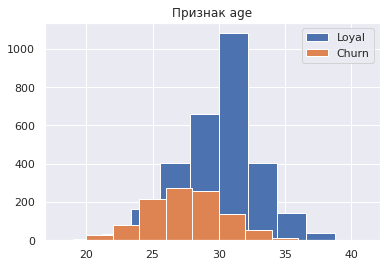

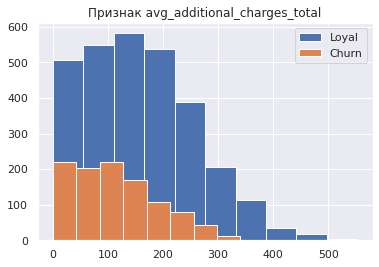

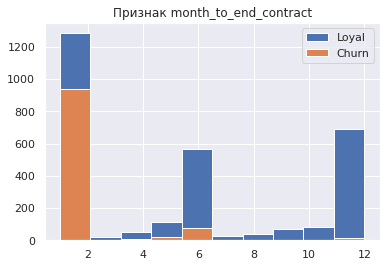

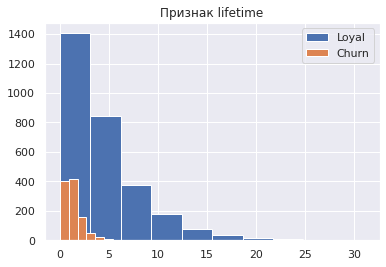

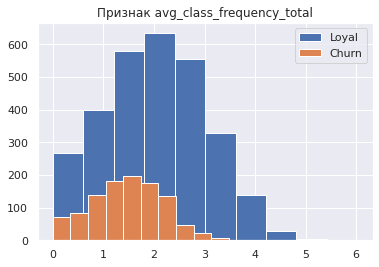

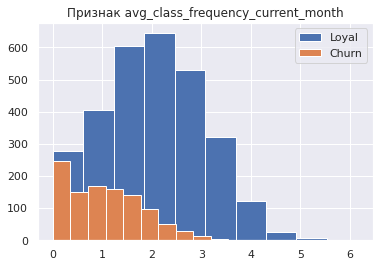

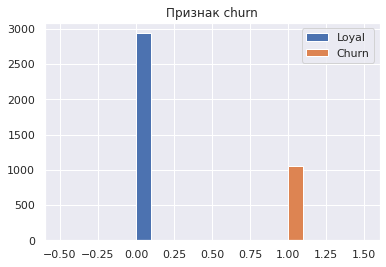

In [6]:
for column in data.columns:
    data.query('churn == 0')[column].hist()
    data.query('churn == 1')[column].hist()
    plt.title('Признак ' + column)
    plt.legend(['Loyal', 'Churn'])
    plt.show()

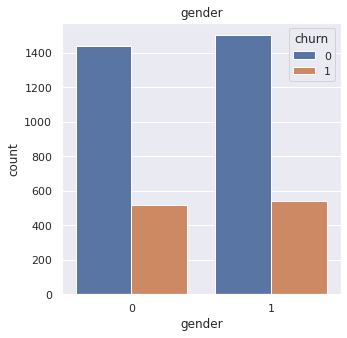

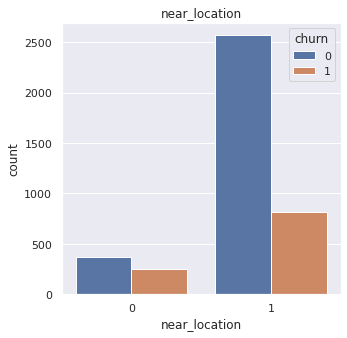

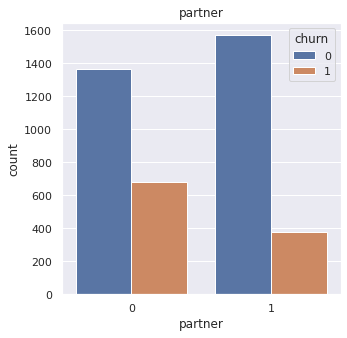

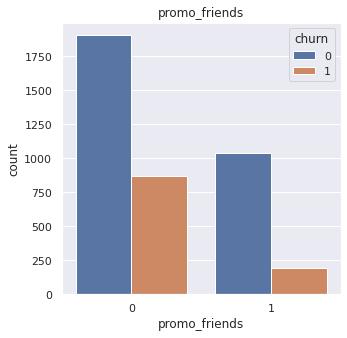

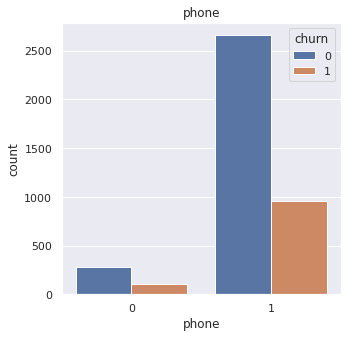

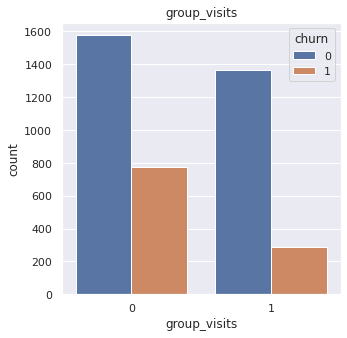

In [7]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = data[column], hue='churn', data=data)
    plt.title(column)
    plt.show()

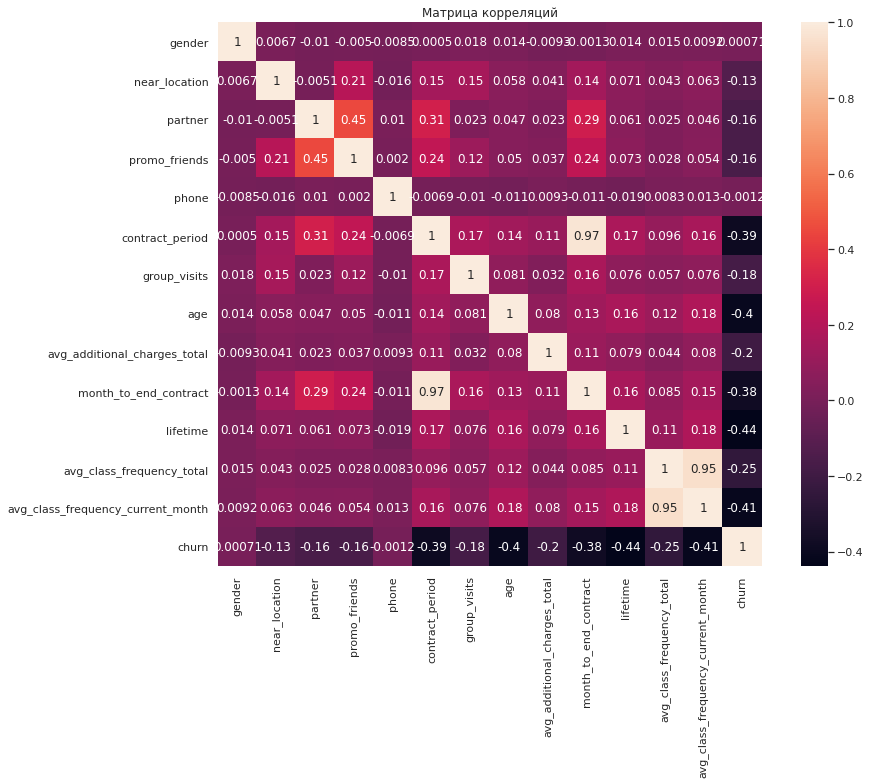

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(data = data.corr(), annot=True, square=True)
plt.title('Матрица корреляций')
plt.show()

Вывод: Средний возраст клиента 29 лет. Молодежь чаще попадает в отток. 

Также чаще в отток попадают клиенты, которые видимо берут пробные занятия. Видим два мультиколлинеарных признака: 
- contract_period
- month_to_end_contact

# Шаг 3. Постройте модель прогнозирования оттока клиентов <a id="step4"></a>

In [9]:
y = data['churn']
X = data.drop(['churn'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

log_reg_model = LogisticRegression(random_state=0)
log_reg_model.fit(X_train_st, y_train)
log_reg_model_predictions = log_reg_model.predict(X_test_st)
log_reg_model_probabilities = log_reg_model.predict_proba(X_test_st)[:,1]
print('Логистическая регрессия:\naccuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, log_reg_model_predictions),
    precision_score(y_test, log_reg_model_predictions),
    recall_score(y_test, log_reg_model_predictions)
))

ran_for_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
ran_for_model.fit(X_train_st, y_train)
ran_for_model_predictions = ran_for_model.predict(X_test_st)
ran_for_model_probabilities = ran_for_model.predict_proba(X_test_st)[:,1]
print('Случайный лес:\naccuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, ran_for_model_predictions),
    precision_score(y_test, ran_for_model_predictions),
    recall_score(y_test, ran_for_model_predictions)
))

feature = pd.DataFrame(log_reg_model.coef_.T, X.columns).reset_index()
feature.columns = ['feature', 'coef']
feature['coef'] = feature['coef'].apply(lambda x: abs(x))
feature = feature.sort_values(by='coef', ascending=False)
print(feature)

Логистическая регрессия:
accuracy_score: 0.9225
precision_score: 0.8541666666666666
recall_score:0.8282828282828283
Случайный лес:
accuracy_score: 0.915
precision_score: 0.8385416666666666
recall_score:0.8131313131313131
                              feature      coef
12  avg_class_frequency_current_month  4.454231
10                           lifetime  3.846281
11          avg_class_frequency_total  3.299788
7                                 age  1.091431
5                     contract_period  0.719095
8        avg_additional_charges_total  0.552164
9               month_to_end_contract  0.534026
6                        group_visits  0.393453
3                       promo_friends  0.275671
2                             partner  0.081512
1                       near_location  0.075644
0                              gender  0.013079
4                               phone  0.004908


Вывод: Модель линейной регрессии показала себя лучше.

# Шаг 4. Сделайте кластеризацию клиентов <a id="step5"></a>

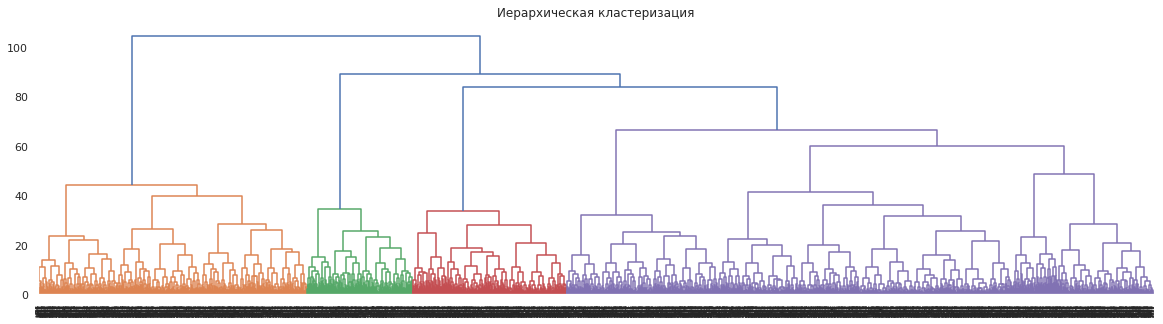

In [10]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(20, 5))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

In [11]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_st)
data['cluster'] = labels

Вывод: Видим 4 больших кластера, и один маленький пятый

In [12]:
data.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


In [13]:
#посмотрим на численность кластеров
data['cluster'].value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster, dtype: int64

Выводы: Самый многочисленные кластеры 3 и 0. Самый малочисленный 1 и 2. Самый большой отток в 3 кластере - 51%, затем во 2 - 44%. Нулевой кластер самый устойчивый.

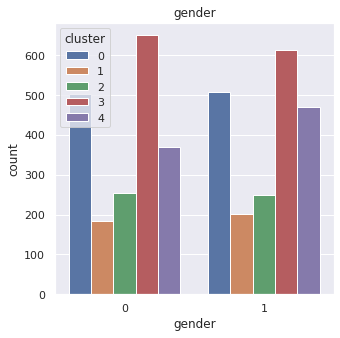

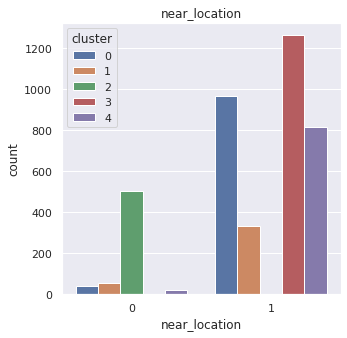

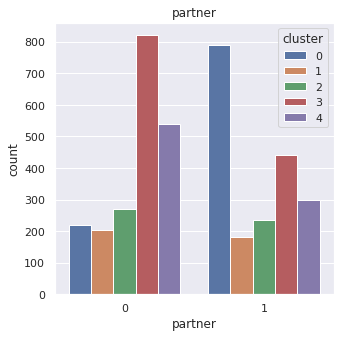

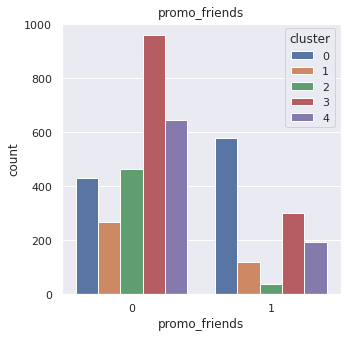

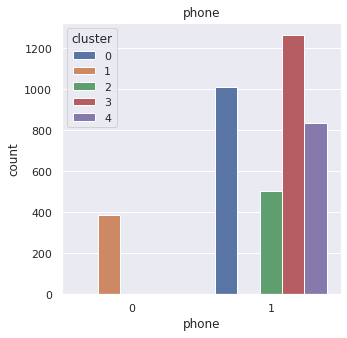

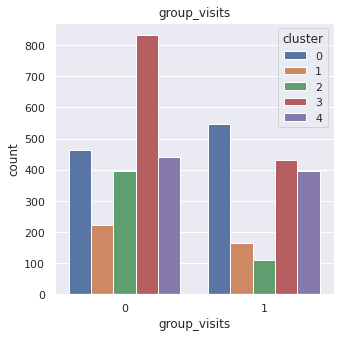

In [14]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = data[column], hue='cluster', data=data)
    plt.title(column)
    plt.show()

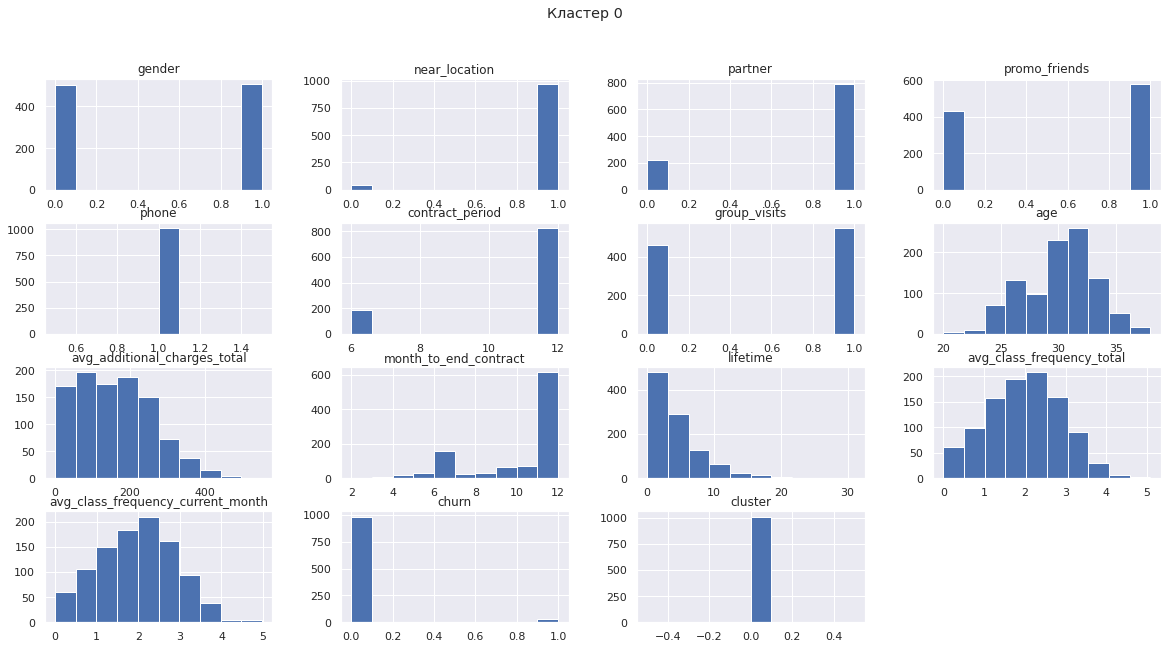

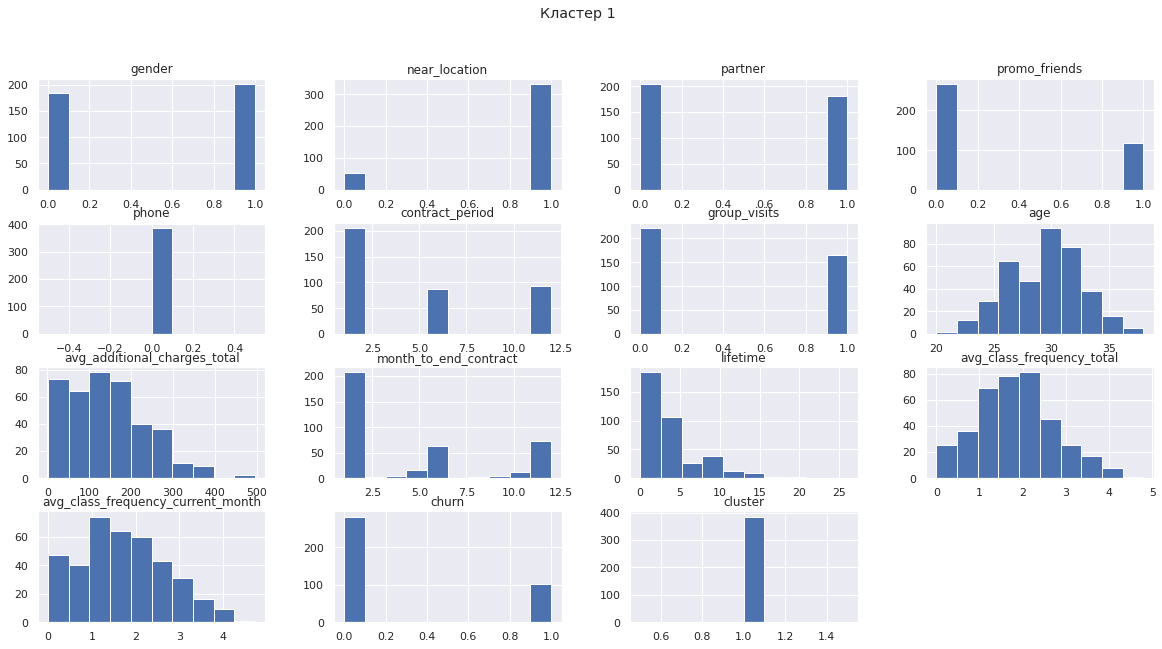

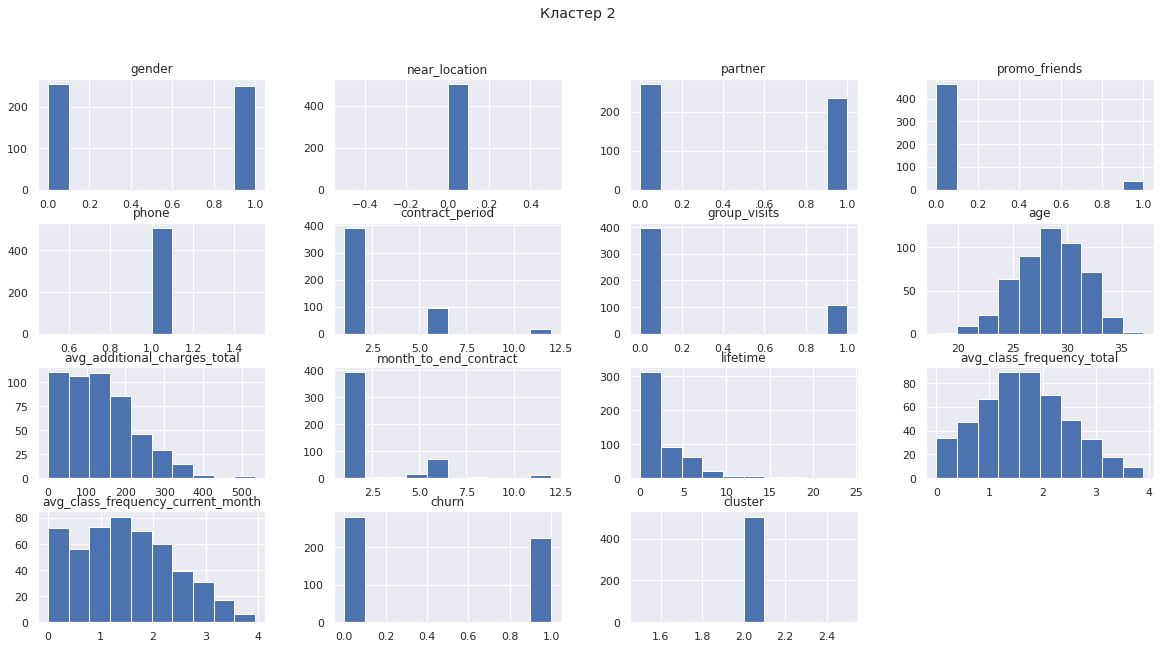

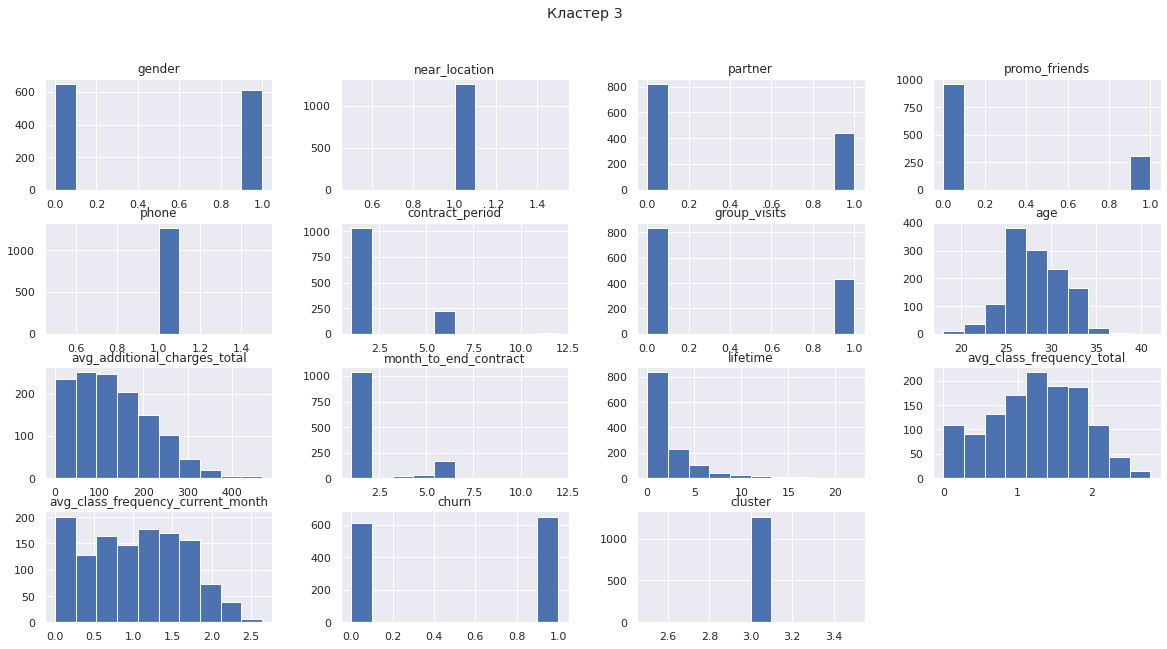

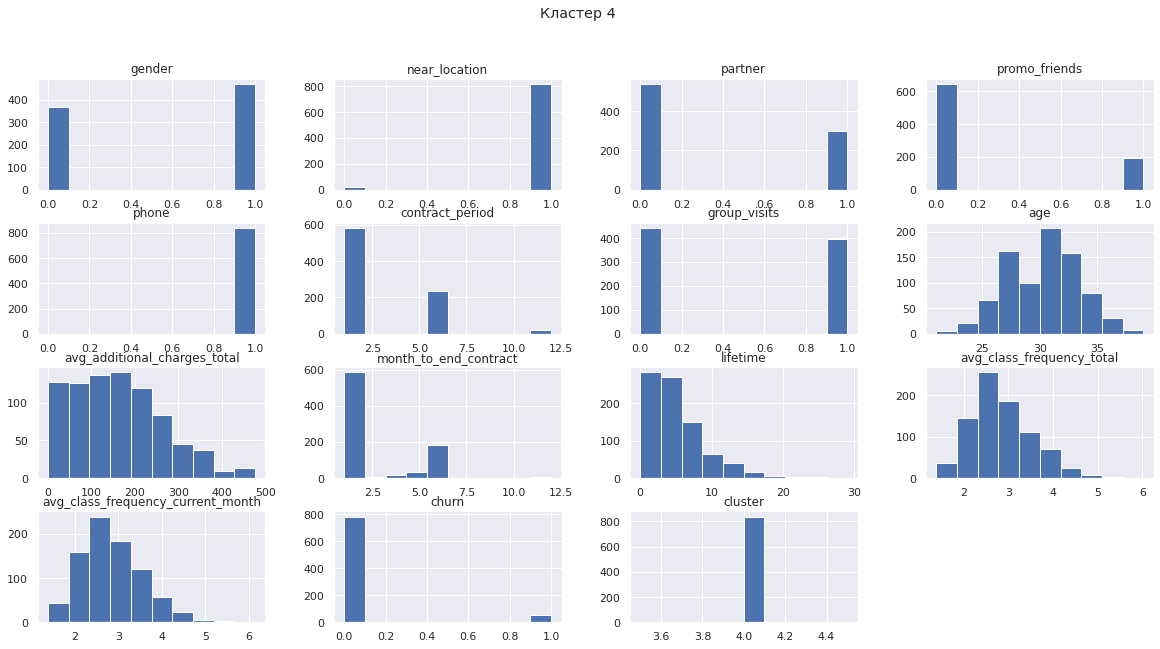

In [15]:
for value in [0, 1, 2, 3, 4]:
    data[data['cluster']==value].hist(figsize=(20,10))
    plt.suptitle('Кластер {}'.format(value))
    plt.show()

In [23]:
data.groupby('cluster').agg({'churn':'mean'}).sort_values(by='churn')

,churn
cluster,
0,0.027723
4,0.068019
1,0.267532
2,0.443564
3,0.514263


# Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами <a id="step6"></a>

- Распределение по возрасту почти равномерное
- Клиенты в большинстве случаев живут около клуба
- Чуть меньше половины клиентов являются партнерами фитнес-клуба
- 1/3 клиентов пришла по акции "Приведи друга"
- В базе есть номера 90% клиентов
- Средний период контракта 6.7 месяцев
- 41% клиентов посещают групповые занятия
- Средний возраст 29 лет
- Суммарная выручка от других услуг фитнес-центра: 146
- Контракты в среднем истекают через 4.3 месяца
- Средняя продолжительность посещения фитнес-клуба 3.7 месяцев
- Средняя частота посещений в неделю за все время с начала действия абонемента почти 1.9
- Средняя частота посещений в неделю за предыдущий месяц 1.8
- Отток клиентов равен 0.27


Выводы по группировки по оттокам:
- Распределение по полу различаются не существенно
- Те, кто живёт рядом меньше попадает в отток
- "Партнеры" меньше перестают посещать клуб
- "Приведи друга" меньше перестаюь посещать клуб также
- Отсутствие телефона не сказывается на оттоке
- Клиенты в оттоке уходят через месяц после первого посещения спортзала
- Пользователи в оттоке меньше посещают групповые занятия
- Пользователи в оттоке младше на 3 года
- Пользователи в оттоке меньше "дают" доп.денег
- У пользователей в оттоке меньше времени по контракту
- Средняя продолжительность посещения пользователей в оттоке меньше почти в 5 раз
- За всё время пользователи в оттоке меньше посещают зал в среднем за неделю
- За месяц (в среднем за неделю) пользователи в оттоке посещают зал в два раза меньше

Самый многочисленные кластеры 3 и 0. Самый малочисленный 1 и 2. Самый большой отток в 3 кластере - 51%, затем во 2 - 44%. Нулевой кластер самый устойчивый.

Рекомендации:

Видим, что в отток в основном попадают молодые клиенты и клиенты, которые живут не близко в фитнес-клубу. Рекомендуется поработать с такими клиентами, возможно предоставить скидку для студентов в утренние часы (не час пик в спортзале). Возможно рядом есть университеты, с которыми можно запартнериться и предоставить более существенные скидки их студентам. Как мы видим из таблиц, партнерские клиенты дольше и чаще ходят в фитнес-клуб. Например, фитнес-клуб может выполнять роль физры в университете, таким образом студенты могут посещать фитнес и перекрывать часы "физкультуры" в универе. Считаю, что вполне жизнеспособная идея, тем более студенты посещают физру первые два года в универе,а в дальнейшей выработают привычку и станут постоянными клиентами.